In [1]:
import sqlalchemy as sa
import pandas as pd
_db = 'sqlite:///guitar_listings.db'
engine = sa.create_engine(_db)

from sqlalchemy import inspect
inspector = inspect(engine)

for table_name in inspector.get_table_names():
    print('*'*50,'\n',table_name,'\n','*'*50)
    for column in inspector.get_columns(table_name):
       print("Column: %s" % column['name'])

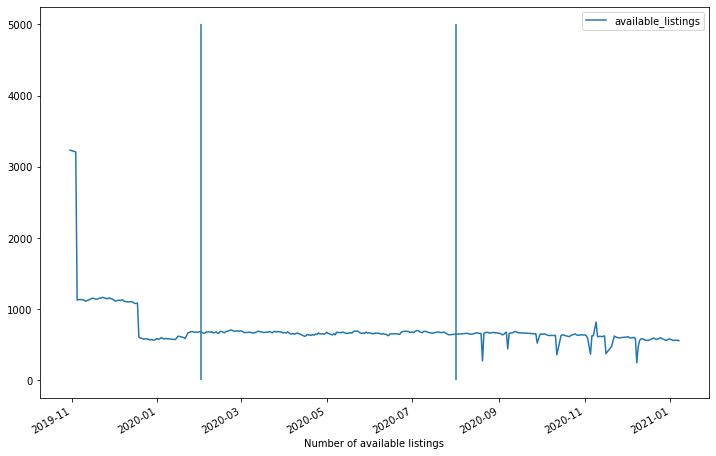

In [2]:
from guitar_scraping.questions import sales_availability
import matplotlib.pyplot as plt
from datetime import datetime
sales_avail_df = sales_availability()
fig, ax = plt.subplots(figsize=(12,8))
sales_avail_df.plot(ax = ax)
ax.set_xlabel('Number of available listings')

start_date = datetime(2020,2,1)
end_date = datetime(2020,8,1)

ax.vlines(start_date,0,5000)
ax.vlines(end_date,0,5000)


In [3]:
from guitar_scraping.questions import daywise_manufacturer_count

manu_count_df = daywise_manufacturer_count(start_date=start_date, end_date=end_date)
most_listed = manu_count_df.sum().sort_values(ascending=False).index[:10]
monthly_average= manu_count_df.resample('M').mean()

daily_average= manu_count_df.resample('D').mean()
most_listed_daily_average= daily_average.loc[:,most_listed]

most_listed_monthly_average= monthly_average.loc[:,most_listed]
most_listed_monthly_average.head()

manufacturer,Gibson,Taylor,Yamaha,Harley Benton,Framus,Fender,Ibanez,Furch,Takamine,Guild
date,,,,,,,,,,
2020-02-29,90.448276,84.241379,58.379310,41.724138,28.206897,31.241379,31.965517,29.586207,34.724138,27.517241
2020-03-31,84.516129,81.258065,50.806452,39.935484,23.161290,27.903226,32.709677,28.838710,31.645161,31.709677
2020-04-30,76.466667,78.166667,44.033333,38.166667,30.966667,24.500000,30.200000,28.400000,26.533333,29.166667
2020-05-31,72.870968,75.354839,47.677419,38.612903,46.354839,32.967742,30.645161,28.580645,25.774194,26.580645
2020-06-30,73.166667,64.000000,43.100000,35.766667,41.666667,32.300000,26.633333,30.100000,28.166667,26.433333


Text(0.5, 0, 'Date')

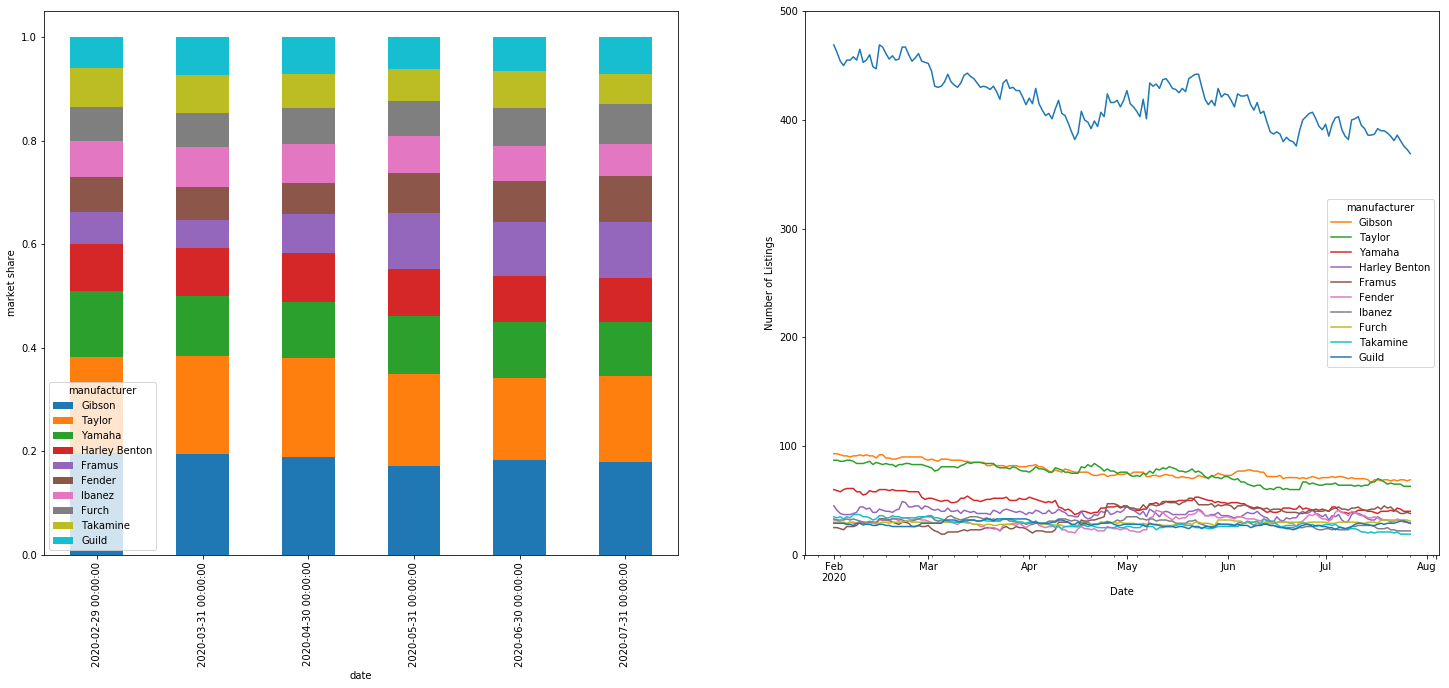

In [4]:
import seaborn as sns
normalized_for_plotting = most_listed_monthly_average.div(most_listed_monthly_average.sum(axis=1), axis=0)
fig, axes = plt.subplots(1,2,figsize=(25,10))
normalized_for_plotting.plot(kind='bar',stacked='True',ax=axes[0])
axes[0].set_ylabel('market share')

most_listed_daily_average.sum(axis=1).plot(kind='line',ax=axes[1],label='Total')
most_listed_daily_average.plot(kind='line',ax=axes[1])
axes[1].set_ylim((0,500))
axes[1].set_ylabel('Number of Listings')
axes[1].set_xlabel('Date')


# Notes:
* Normalize market share to total listings
* make line plot with daily data
* add a 'others' category

# Other possible questions:
* number of unique Artikelnummern per manufacturer over time 
* are there dates at which manufacturers tend to release new guitars?
* Segment manufacturers bynumber of listings, average price, price range, sales rank?

In [5]:
import os
os.getcwd()

'C:\\Users\\Carl\\guitar_scraping'